# GloVe vectors for sentiment analysis

Last time, we discuss how GloVe vectors are trained for sentiment analysis.

We will use a package called `torchtext`, which works with torch, to explore
and use GloVe vectors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd 'drive/My Drive/Deep Learning (2023)/P10 - Embedding'

In [3]:
!pip install torchtext

     |████████████████████████████████| 2.3 MB 8.5 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 147.0 MB 2.9 MB/s eta 0:00:01�████████████████████▌      | 117.3 MB 2.4 MB/s eta 0:00:13
     |████████████████████████████████| 5.7 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 166 kB 2.8 MB/s eta 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1 requires torch==1.13.1, but you have torch 2.1.0 which is incompatible.


In [ ]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt

## GloVe vectors

We will use the `6B` version of the GloVe vector. There are several versions of
the embedding that is available. We will start with the smallest one, which is
the 50 dimensional vector. Later on, we will use the 100 dimensional word vectors.

In [4]:
# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", dim=50, max_vectors=20000)

Let's look at what the embedding of the word "car" looks like:

In [5]:
glove['car']

tensor([ 0.4769, -0.0846,  1.4641,  0.0470,  0.1469,  0.5082, -1.2228, -0.2261,
         0.1931, -0.2976,  0.2060, -0.7128, -1.6288,  0.1710,  0.7480, -0.0619,
        -0.6577,  1.3786, -0.6804, -1.7551,  0.5832,  0.2516, -1.2114,  0.8134,
         0.0948, -1.6819, -0.6450,  0.6322,  1.1211,  0.1611,  2.5379,  0.2485,
        -0.2682,  0.3282,  1.2916,  0.2355,  0.6147, -0.1344, -0.1324,  0.2740,
        -0.1182,  0.1354,  0.0743, -0.6195,  0.4547, -0.3032, -0.2188, -0.5605,
         1.1177, -0.3659])

It is troch tensor with dimension `(50,)`. It is difficult to determine what each
number in this embedding means, if anything. However, we know that there is structure
in this embedding space. That is, distances in this embedding space is meaningful.

So, let's compute the Euclidean distance between (the embedding of) the word "car"
and several other words. The Euclidean distance (or the $L_2$ norm of the distance vector) 
is computed as $\sqrt{\sum_i (x_i - y_i)^2}$ for word vectors $x$ and $y$.

In [6]:
word = 'car'
other = ['bike', 'girl', 'computer', 'space', 'was', 'kite']
for w in other:
    dist = torch.norm(glove[word] - glove[w]) # euclidean distnace
    print(w, float(dist))

bike 4.049488544464111
girl 5.822113513946533
computer 5.773685455322266
space 5.680059432983398
was 4.97991418838501
kite 6.30803108215332


The Euclidean distance is a *distance* measure, and the smaller the distance, the
closer the embeddings are to each other.
The word "bike" is closest to the word "car" out of all the words in that list.


Instead of using the Euclidean distance, we can use a different distance measure.
For example, we can compute the cosine similarity, a measure of the angle between the
two vectors:

In [7]:
for w in other:
    dist = torch.nn.functional.cosine_similarity(glove['car'].unsqueeze(0), glove[w].unsqueeze(0))
    print(w, float(dist))

bike 0.725685179233551
girl 0.4777982234954834
computer 0.5121089220046997
space 0.47960785031318665
was 0.5771499276161194
kite 0.18111218512058258


The cosine similiarity is a *similarity* measure, and the larger the similarity,
the "closer" the word embeddings are to each other.
The word "bike" is still closest to the word "car" out of all the words in that list
using this measure.

We can compare other pairs of words in the same way:

In [8]:
word = 'candy'
other = ['chocolate', 'sugar', 'cartoon', 'computer', 'bike', 'girl', 'was', 'car']
for w in other:
    dist = torch.norm(glove[word] - glove[w])
    cosdist = torch.nn.functional.cosine_similarity(glove[word].unsqueeze(0), glove[w].unsqueeze(0))
    print(w, float(dist), float(cosdist), sep="\t")

chocolate	3.198564291000366	0.8237079381942749
sugar	4.297327041625977	0.6400755047798157
cartoon	5.009539604187012	0.46070605516433716
computer	6.351091384887695	0.2876129448413849
bike	5.718624114990234	0.2939280569553375
girl	5.41274881362915	0.4525235891342163
was	5.975125789642334	0.21566355228424072
car	5.906295299530029	0.35387226939201355


In [9]:
word = 'happy'
other = ['good', 'sad', 'tired', 'bad', 'unhappy', 'cry']
for w in other:
    dist = torch.norm(glove[word] - glove[w])
    cosdist = torch.nn.functional.cosine_similarity(glove[word].unsqueeze(0), glove[w].unsqueeze(0))
    print(w, float(dist), float(cosdist), sep="\t")

good	2.7146358489990234	0.8574144244194031
sad	3.8399498462677	0.689063310623169
tired	3.1427841186523438	0.7785124182701111
bad	3.7550671100616455	0.7083954811096191
unhappy	3.2546584606170654	0.716782808303833
cry	3.326601266860962	0.7269507646560669


The second example is interesting, because "happy" and "sad" represent human
sentiments that are the opposite ends of the sentiment spectrum.
For more examples, see https://lamyiowce.github.io/word2viz/

## Sentiment Analysis

**Sentiment Analysis** is the problem of identifying the writer's sentiment given a piece of text.
It can be applied to movie reviews, feedback of other forms, emails, tweets, and
even course evaluations.

Rudimentary forms of **sentiment analysis** might involve scoring each
word on a scale from "sad" to "happy", then averaging the "happiness score" of each
word in a piece of text. This technique has obvious drawbacks: it won't be able to handle
negation, sarcasm, or any complex syntactical form. We can do better.
In fact, we will use the sentiment analysis task as an example in the next few
lectures.

Specifically, we will use the Sentiment140 data set. This dataset contains tweets containing
either a positive or negative emoticon. Our goal is to determine whether which type of
emoticon the tweet (with the emoticon removed) contained. THe dataset was actually collected by
a group of students, just like you, who are doing their first machine learning project.

You can download the data here: http://help.sentiment140.com/for-students

Let's look at the data:

In [10]:
import csv

def get_data():
    return csv.reader(open("training.1600000.processed.noemoticon.csv", "rt", encoding="latin-1"))

for i, line in enumerate(get_data()):
    if i > 10:
        break
    print(line)

['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]
['0', '1467810672', 'Mon Apr 06 22:19:49 PDT 2009', 'NO_QUERY', 'scotthamilton', "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"]
['0', '1467810917', 'Mon Apr 06 22:19:53 PDT 2009', 'NO_QUERY', 'mattycus', '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds']
['0', '1467811184', 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'ElleCTF', 'my whole body feels itchy and like its on fire ']
['0', '1467811193', 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'Karoli', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]
['0', '1467811372', 'Mon Apr 06 22:20:00 PDT 2009', 'NO_QUERY', 'joy_wolf', '@Kwesidei not the whole crew ']
['0', '14

The the columns we care about is the first one and the last one. The first column is the
label (the label `0` means "sad" tweet, `4` means "happy" tweet), and the last column
contains the tweet. Our task is to predict the sentiment of the tweet given the text.

The appropach today is as follows, for each tweet:

1. We will split the text into words. We will do so by splitting at all whitespace
   characters. There are better ways to perform the split, but I don't want to
   introduce too many new packages today.
2. We will look up the embedding of each word. Words that do not have a GloVe vector
   will have the embedding 0.
3. We will sum up all the embeddings, to get an embedding for an entire tweet.
4. Finally, we will use a fully-connected neural network (a **multi-layer peceptron** or MLP)
   to predict whether the tweet has positive or negative sentiment.

First, let's sanity check that there are enough words for us to work with.

In [11]:
def split_tweet(tweet):
    # separate punctuations
    tweet = tweet.replace(".", " . ") \
                 .replace(",", " , ") \
                 .replace(";", " ; ") \
                 .replace("?", " ? ")
    return tweet.split()

for i, line in enumerate(get_data()):
    if i > 30:
        break
    print(sum(int(w in glove.stoi) for w in split_tweet(line[-1])))

12
20
14
9
20
4
2
18
3
3
8
3
15
13
18
15
17
4
7
11
11
21
6
9
4
9
10
4
20
17
12


Looks like each tweet has at least one word that has an embedding.

Now, steps 1-3 from above can be done ahead of time, just like in our transfer
learning assinment. So, we will write a function that will take the tweets data
file, computes the tweet embeddings, and splits the data into train/validation/test.

We will only use $\frac{1}{59}$ of the data in the file, so that this demo runs
relatively quickly.

In [12]:
def get_tweet_vectors(glove_vector):
    train, valid, test = [], [], []
    for i, line in enumerate(get_data()):
        tweet = line[-1]
        if i % 59 == 0:
            vector_sum = sum(glove_vector[w] for w in split_tweet(tweet))
            label = torch.tensor(int(line[0] == "4")).long()
            if i % 5 < 3:
                train.append((vector_sum, label))
            elif i % 5 == 4:
                valid.append((vector_sum, label))
            else:
                test.append((vector_sum, label))
    return train, valid, test

I'm making the `glove_vector` a parameter so that we can use a larger dimensional
embedding later. Now, let's get our training, validation, and test set.
The format is what `torch.utils.data.DataLoader` expects.

In [13]:
train, valid, test = get_tweet_vectors(glove)

train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

Now, our actual training script! Note that will we use `CrossEntropyLoss`,
have two neurons in the final layer of our output layer, and use softmax instead of
a sigmoid activation. This is different from our choice in the earlier weeks! Typically,
having two neurons instead of one and using softmax performs better than having only
a single neuron.

In [14]:
def train_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for tweets, labels in train_loader:
            optimizer.zero_grad()
            pred = model(tweets)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))     
        if epoch % 5 == 4:
            epochs.append(epoch)
            train_acc.append(get_accuracy(model, train_loader))
            valid_acc.append(get_accuracy(model, valid_loader))
            print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
                epoch+1, loss, train_acc[-1], valid_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

As for the actual mode, we will start with a 3-layer neural network.
We won't create our own class since this is a fairly straightforward neural
network, so an `nn.Sequential` object will do. Let's build and train our network.

Epoch 5; Loss 0.603663; Train Acc 0.648086; Val Acc 0.639749
Epoch 10; Loss 0.610238; Train Acc 0.652511; Val Acc 0.657633
Epoch 15; Loss 0.542912; Train Acc 0.660132; Val Acc 0.659292
Epoch 20; Loss 0.672362; Train Acc 0.663819; Val Acc 0.664823
Epoch 25; Loss 0.682342; Train Acc 0.666585; Val Acc 0.665007
Epoch 30; Loss 0.688303; Train Acc 0.669043; Val Acc 0.667588
Epoch 35; Loss 0.559828; Train Acc 0.671563; Val Acc 0.668879
Epoch 40; Loss 0.428740; Train Acc 0.674144; Val Acc 0.670170
Epoch 45; Loss 0.652430; Train Acc 0.676787; Val Acc 0.668326
Epoch 50; Loss 0.699820; Train Acc 0.678815; Val Acc 0.672935


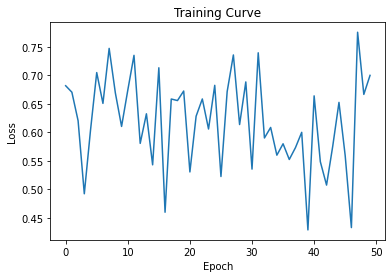

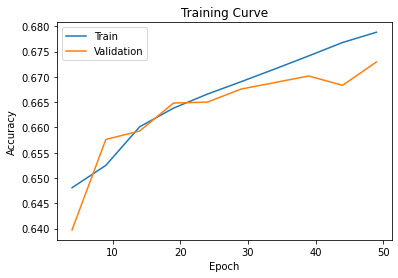

0.6698008849557522

In [15]:
mymodel = nn.Sequential(nn.Linear(50, 40),
                        nn.ReLU(),
                        nn.Linear(40, 20),
                        nn.ReLU(),
                        nn.Linear(20, 2))
train_network(mymodel, train_loader, valid_loader, num_epochs=50, learning_rate=1e-4)
get_accuracy(mymodel, test_loader)

We can try a smaller network:

Epoch 5; Loss 0.859128; Train Acc 0.562596; Val Acc 0.577802
Epoch 10; Loss 0.593138; Train Acc 0.588163; Val Acc 0.606563
Epoch 15; Loss 0.688064; Train Acc 0.615820; Val Acc 0.628872
Epoch 20; Loss 0.703857; Train Acc 0.630017; Val Acc 0.638459
Epoch 25; Loss 0.617042; Train Acc 0.640833; Val Acc 0.647124
Epoch 30; Loss 0.676192; Train Acc 0.648393; Val Acc 0.652655
Epoch 35; Loss 0.494183; Train Acc 0.652265; Val Acc 0.653577
Epoch 40; Loss 0.795177; Train Acc 0.655338; Val Acc 0.652655
Epoch 45; Loss 0.581228; Train Acc 0.657612; Val Acc 0.663532
Epoch 50; Loss 0.710749; Train Acc 0.658472; Val Acc 0.662795


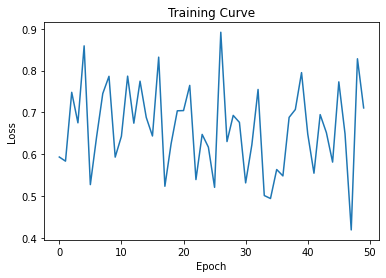

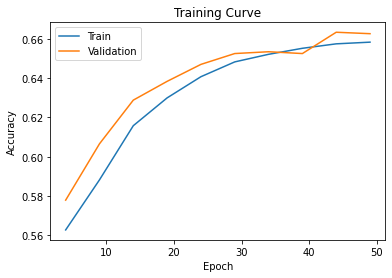

0.6591076696165191

In [16]:
mymodel = nn.Linear(50, 2)
train_network(mymodel, train_loader, valid_loader, num_epochs=50, learning_rate=1e-4)
get_accuracy(mymodel, test_loader)

We can also try using a larger dimensional embedding:

Epoch 5; Loss 0.700183; Train Acc 0.645996; Val Acc 0.643621
Epoch 10; Loss 0.518306; Train Acc 0.672362; Val Acc 0.661504
Epoch 15; Loss 0.771895; Train Acc 0.680720; Val Acc 0.670354
Epoch 20; Loss 0.485921; Train Acc 0.687850; Val Acc 0.674779
Epoch 25; Loss 0.578465; Train Acc 0.696638; Val Acc 0.681232
Epoch 30; Loss 0.721259; Train Acc 0.699035; Val Acc 0.684735
Epoch 35; Loss 0.587121; Train Acc 0.701002; Val Acc 0.682891
Epoch 40; Loss 0.594768; Train Acc 0.707394; Val Acc 0.686763
Epoch 45; Loss 0.524380; Train Acc 0.707455; Val Acc 0.682153
Epoch 50; Loss 0.504623; Train Acc 0.709545; Val Acc 0.678097
Epoch 55; Loss 0.413364; Train Acc 0.711265; Val Acc 0.684550
Epoch 60; Loss 0.561295; Train Acc 0.714093; Val Acc 0.680678
Epoch 65; Loss 0.465494; Train Acc 0.718149; Val Acc 0.681047
Epoch 70; Loss 0.538139; Train Acc 0.719808; Val Acc 0.682153
Epoch 75; Loss 0.336039; Train Acc 0.721529; Val Acc 0.684919
Epoch 80; Loss 0.558057; Train Acc 0.723803; Val Acc 0.683628
Epoch 85;

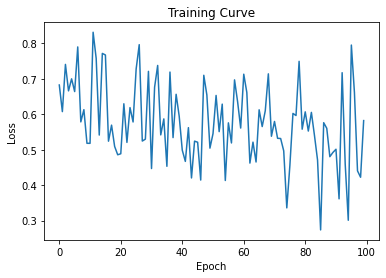

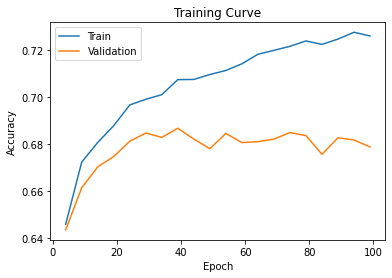

0.6889749262536873

In [17]:
glove = torchtext.vocab.GloVe(name="6B", dim=100, max_vectors=20000)
train, valid, test = get_tweet_vectors(glove)
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

mymodel = nn.Sequential(nn.Linear(100, 45), nn.ReLU(), nn.Linear(45, 2))
train_network(mymodel, train_loader, valid_loader, num_epochs=100, learning_rate=1e-4)
get_accuracy(mymodel, test_loader)